<a href="https://colab.research.google.com/github/Jueunkim429/Colab-Notebooks/blob/main/Squat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 모션캡처 결과로 계산된 무릎 각도 데이터 탐색하기

In [1]:
import pandas as pd
# load dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/squat_angle.csv", delimiter=',')
data.head()

,Frame#,Time,Angle
0,1000,16.650,160.52260
1,1001,16.667,160.53308
2,1002,16.683,160.54486
3,1003,16.700,160.55446
4,1004,16.717,160.55936


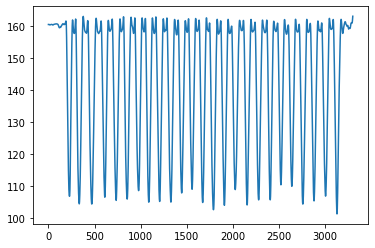

In [2]:
data['Angle'].plot()

In [4]:
import numpy as np

Fs = 60 #sampling rate; 60HZ
varCount =0 #variable for count proper squat motion
varHold = np.zeros(len(data['Angle'])) #variable for counting time point holding the sqaut posture
varDur = [] #list variable for storing posture duration
flag=np.zeros(len(data['Angle'])) #array for flag vales per time point

Thres = 150 #arbitrary angle for thresholding; 150 deg

for i in range(len(data['Angle'])):
  if data['Angle'][i]<Thres:
    flag[i]=1
  else:
    flag[i]=0
  
  varHold[i] = varHold[i-1] + flag[i] #cumulate the flag value
  
  if varHold[i] == varHold[i-1] and varHold[i]>40: #flag becomes zero and cumulated flag reache to few seconds.
    varCount+=1
    varDur.append(varHold[i])
    varHold[i]=0

print(varCount)
print(varDur)
print("Given Data performed {0:d} times of Sqaut with correct posture".format(varCount))
averageDur = sum(varDur)/len(varDur)
print(averageDur/Fs)
print('Average posture duration is {0: .2f} sec'.format(averageDur/Fs))

25
[51.0, 60.0, 66.0, 57.0, 62.0, 59.0, 58.0, 56.0, 60.0, 62.0, 56.0, 56.0, 59.0, 63.0, 60.0, 63.0, 58.0, 60.0, 53.0, 53.0, 56.0, 62.0, 61.0, 62.0, 61.0]
Given Data performed 25 times of Sqaut with correct posture
0.9826666666666667
Average posture duration is  0.98 sec
